In [1]:
from math import sin, cos, log
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16

In [2]:
#model params:
g=9.8 #[m/s^2]
v_t = 5.0 #[m/s] trim velocity
C_D = 1/5.0 #coeff of drag (D/L when C_L=1)
C_L = 1.0 #coeff of lift

#ICs
v0 = 6.5
theta0 = -0.1
x0 = 0.0
y0 = 2.0

In [3]:
def f(u):
    '''Returns RHS of phugoid system of eqns.
    
    Parameters:
        u: array containing solution at time n
        
    Returns: 
        dudt: array containting the RHS given u
    '''
    
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    print(v)
    return numpy.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2,
                       -g*cos(theta)/v + g/v_t**2*v,
                       v*cos(theta),
                       v*sin(theta)])
    
def euler(u, f, dt):
    '''Returns solution at next time step using Eulers method
    
    Parameters:
        u: soln. at previous time step
        f: function
        dt
        
    Returns:
        u[n+1] approximate solution at next time step
    '''
    return u+ dt*f(u)
    
def get_diffgrid(u_current, u_fine, dt):
    '''Returns difference between current grid and finest grid using L-1 norm
    
    Params:
        u_current: soln on current grid
        u_finest: soln on the finest grid
        dt
        
    returns:
        diffgrid: difference computed in L-1 norm
    
    '''
    
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
    
    grid_size_ratio = numpy.ceil(N_fine/N_current)
    diffgrid = dt*numpy.sum(numpy.abs(u_current[:,2] - u_fine[::grid_size_ratio,2]))
    
    return diffgrid

In [4]:
def rk2(u, f, dt):
    ''' Returns the solution at next time step using second order RK method
    
    Parameters: 
        u: sol. at previous time step
        f: funtion to compute RHS of system of eqns.
        dt
        
    Returns:
        u(n+1): solution at next time step.
    '''
    u_star = u + 0.5*dt*f(u)
    return u + dt*f(u_star)


In [5]:
#discretize time step
T = 15.0
dt = 0.01
N = int(T/dt) + 1

#ICs
u_euler = numpy.empty((N,4))
u_rk2 = numpy.empty((N,4))

#initialize arrays
u_euler[0] = numpy.array([v0, theta0, x0, y0])
u_rk2[0] = numpy.array([v0, theta0, x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler(u_euler[n], f, dt)
    u_rk2[n+1] = rk2(u_rk2[n], f, dt)

6.5
6.5
6.48832983742
6.47665967483
6.47626750194
6.46421084866
6.45253453581
6.45177296797
6.43934080534
6.42764639314
6.42653844957
6.41374184523
6.40201724491
6.40058616374
6.3874362646
6.37566926283
6.37393847915
6.36044650465
6.34862477845
6.34661790291
6.33279513849
6.32090626974
6.31864706777
6.30450485856
6.29253634834
6.29004871978
6.27559846465
6.2635377471
6.26084570658
6.24609885234
6.23393330836
6.23106096614
6.21602900208
6.20374597258
6.20071751607
6.18541196876
6.17299876766
6.16983844351
6.15427087185
6.14171479877
6.13844689556
6.12262888616
6.10991723872
6.10656607023
6.09050923304
6.07762931897
6.07421920806
6.05793517228
6.04487432115
6.04142958419
6.02492999447
6.01167556921
6.00822050105
5.99151701398
5.97805642209
5.9746152816
5.95771956244
5.94404026704
5.9406372631
5.92356098282
5.90965051343
5.9063097914
5.88906462395
5.87491058712
5.8716562158
5.85425383565
5.83984392544
5.83669988434
5.81915196426
5.8044739726
5.80146413963
5.78378234872
5.76882417568
5.765

In [6]:
x_euler = u_euler[:,2]
y_euler = u_euler[:,3]
x_rk2 = u_rk2[:,2]
y_rk2 = u_rk2[:,3]

In [7]:
idx_negative_euler = numpy.where(y_euler<0.0)[0]
if len(idx_negative_euler)==0:
    idx_ground_euler = N-1
    print('Euler is still running')
else:
    idx_ground_euler = idx_negative_euler[0]

idx_negative_rk2 = numpy.where(y_rk2<0.0)[0]
if len(idx_negative_rk2)==0:
    idx_ground_rk2 = N-1
    print('RK is still running')
else:
    idx_ground_rk2 = idx_negative_rk2[0]

In [8]:
# check to see if the paths match
print('Are the x-values close? {}'.format(numpy.allclose(x_euler, x_rk2)))
print('Are the y-values close? {}'.format(numpy.allclose(y_euler, y_rk2)))

Are the x-values close? False
Are the y-values close? False


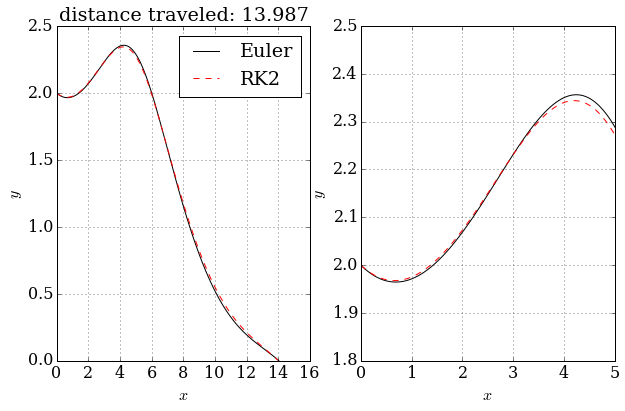

In [9]:
# plot the glider path
pyplot.figure(figsize=(10,6))
pyplot.subplot(121)
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(x_euler[:idx_ground_euler], y_euler[:idx_ground_euler], 'k-', label='Euler')
pyplot.plot(x_rk2[:idx_ground_rk2], y_rk2[:idx_ground_rk2], 'r--', label='RK2')
pyplot.title('distance traveled: {:.3f}'.format(x_rk2[idx_ground_rk2-1]))
pyplot.legend();

#zoom in
pyplot.subplot(122)
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(x_euler, y_euler, 'k-', label='Euler')
pyplot.plot(x_rk2, y_rk2, 'r--', label='RK2')
pyplot.xlim(0,5)
pyplot.ylim(1.8,2.5);

In [10]:
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, .001])
u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N= int(T/dt)+1
    t = numpy.linspace(0.0, T, N)
    u = numpy.empty((N,4))
    u[0] = numpy.array([v0, theta0, x0, y0])
    
    for n in range(N-1):
        u[n+1] = rk2(u[n], f, dt)
    
    u_values[i] = u

6.5
6.38329837416
6.22718567839
6.07670847181
5.89825865107
5.72568658293
5.53687124343
5.35404930431
5.16669662002
4.98540601126
4.81119630481
4.64307828431
4.49349037897
4.34986390807
4.23567479569
4.12687359862
4.05680412247
3.99074339646
3.96928693122
3.94951500482
3.97499875054
3.99932912431
4.06386386893
4.12477265163
4.21653728119
4.30324416456
4.40956566304
4.51050240065
4.62002251217
4.72459527816
4.82816385703
4.92760840266
5.01840291822
5.10602978161
5.179386906
5.25053412457
5.30372109706
5.35559661082
5.38758359771
5.41907002746
5.43030340413
5.44174425836
5.43391091889
5.42688063571
5.40266008947
5.37972004978
5.34252863548
5.3069747139
5.26070930992
5.21631786029
5.16510463236
5.11588188266
5.06383129455
5.01376769073
4.96473396996
4.91756323365
4.87490845774
4.83387407124
4.80024590216
4.7678864589
4.74503218815
4.72300872312
4.71165950683
4.70065560186
4.70051388372
4.70023526919
4.71008021438
4.71936234487
4.73725840686
4.75426486304
4.7778322412
4.8003062007
4.827002

In [11]:
diffgrid = numpy.empty_like(dt_values)
for i, dt in enumerate(dt_values):
    diffgrid[i] = get_diffgrid(u_values[i], u_values[-1], dt)

/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:51: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


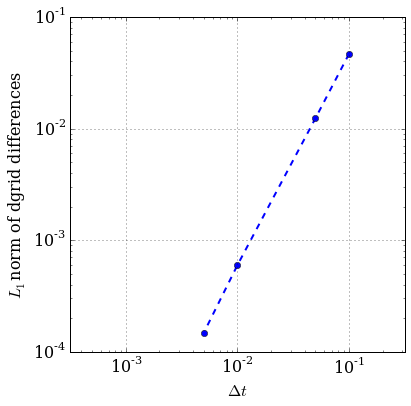

In [12]:
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel(r'$\Delta t$', fontsize=16)
pyplot.ylabel(r'$L_1$norm of dgrid differences', fontsize=16)
pyplot.xlim(1e-4,2)
pyplot.ylim(1e-4,1)
pyplot.axis('equal')
pyplot.loglog(dt_values[:-1], diffgrid[:-1], ls='--', lw=2, marker='o');

In [13]:
%%time
r=2
h=.001

dt_values = numpy.array([h, r*h, r**2*h])
u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N= int(T/dt)+1
    t=numpy.linspace(0.0, T, N)
    u = numpy.empty((N,4))
    u[0] = numpy.array([v0, theta0, x0, y0])
    
    for n in range(N-1):
        u[n+1] = rk2(u[n], f, dt)
        
    u_values[i] = u
    
alpha = (log(get_diffgrid(u_values[2], u_values[1], dt_values[2])) -log(get_diffgrid(u_values[1], u_values[0], dt_values[1])))/log(r)

print('The order of convergence is alpha = {:3f}'.format(alpha))

6.5
6.49883298374
6.4976620479
6.49649111774
6.4953162789
6.49414144574
6.49296271479
6.49178398954
6.4906013774
6.48941877097
6.48823228857
6.48704581188
6.48585547016
6.48466513415
6.48347094405
6.48227675966
6.48107873213
6.47988071031
6.47867885631
6.47747700803
6.47627133853
6.47506567476
6.47385620075
6.47264673246
6.47143346492
6.47022020311
6.46900315304
6.4677861087
6.46656528711
6.46534447125
6.46411988915
6.46289531279
6.4616669812
6.46043865536
6.45920658533
6.45797452103
6.45673872359
6.45550293189
6.45426341809
6.45302391003
6.45178069093
6.45053747757
6.44929056423
6.44804365664
6.44679306014
6.4455424694
6.44428820081
6.44303393799
6.44177600842
6.44051808462
6.43925650516
6.43799493146
6.43672971322
6.43546450075
6.43419565484
6.43292681471
6.43165435225
6.43038189557
6.4291058277
6.42782976561
6.42655010347
6.4252704471
6.42398720182
6.42270396233
6.42141714507
6.42013033361
6.41883995553
6.41754958325
6.41625565552
6.41496173359
6.4136642674
6.41236680699
6.411065813

/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:51: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [14]:
%%time
r=2
h=.001

dt_values = numpy.array([h, r*h, r**2*h])
u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N= int(T/dt)+1
    t=numpy.linspace(0.0, T, N)
    u = numpy.empty((N,4))
    u[0] = numpy.array([v0, theta0, x0, y0])
    
    for n in range(N-1):
        u[n+1] = euler(u[n], f, dt)
        
    u_values[i] = u
    
alpha = (log(get_diffgrid(u_values[2], u_values[1], dt_values[2])) -log(get_diffgrid(u_values[1], u_values[0], dt_values[1])))/log(r)

print('The order of convergence is alpha = {:3f}'.format(alpha))

6.5
6.49766596748
6.49532409532
6.49297440529
6.49061691919
6.48825165883
6.48587864604
6.4834979027
6.48110945065
6.4787133118
6.47630950806
6.47389806135
6.47147899362
6.46905232683
6.46661808297
6.46417628403
6.46172695204
6.45927010902
6.45680577703
6.45433397815
6.45185473445
6.44936806804
6.44687400104
6.44437255558
6.44186375383
6.43934761794
6.43682417011
6.43429343254
6.43175542744
6.42921017705
6.42665770362
6.42409802941
6.42153117671
6.4189571678
6.416376025
6.41378777064
6.41119242705
6.40859001659
6.40598056164
6.40336408456
6.40074060777
6.39811015367
6.3954727447
6.39282840329
6.39017715189
6.38751901298
6.38485400903
6.38218216255
6.37950349604
6.37681803202
6.37412579302
6.3714268016
6.3687210803
6.36600865172
6.36328953842
6.36056376302
6.35783134811
6.35509231632
6.35234669029
6.34959449266
6.34683574609
6.34407047324
6.3412986968
6.33852043947
6.33573572394
6.33294457292
6.33014700916
6.32734305537
6.32453273431
6.32171606874
6.31889308143
6.31606379516
6.313228232

/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:51: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Challenge Task: timing

The second order Runge-Kutta method runs in a total time of 1.2s, while the first order Euler method runs in 0.747s.

In [15]:
def leapfrog(un1, u, f, dt):
    
    return un1 + 2.0*dt*f(u)


In [16]:
g = 9.8
v_t = 5.0
C_D = 1/5.0
C_L = 1.0
#ICs
v0 = 6.5
theta0 = -0.1
x0 = 0.0
y0= 2.0

T=15.0
dt = 0.01
N= int(T/dt) +1

u_leapfrog = numpy.empty((N,4))
u_leapfrog[0] = numpy.array([v0, theta0, x0, y0])

u_leapfrog[1] = rk2(u_leapfrog[0], f, dt)

6.5
6.48832983742


In [17]:
for n in range(1,N-1):
    u_leapfrog[n+1] = leapfrog(u_leapfrog[n-1], u_leapfrog[n], f, dt)

6.47626750194
6.45177338686
6.42653890301
6.4005870161
6.37393940196
6.34661920356
6.31864847568
6.29005048304
6.26084761437
6.23106320511
6.2007199368
6.16984116928
6.13844983977
6.10656929103
6.07422268297
6.04143330466
6.00822450972
5.97461950194
5.9406418037
5.90631450664
5.8716612808
5.83670508356
5.80146971508
5.76597798076
5.73025379665
5.69431980253
5.65820001903
5.62191691028
5.58549459264
5.5489553477
5.51232338051
5.4756207858
5.43887185145
5.40209848288
5.36532504536
5.32857325356
5.29186754435
5.25522944038
5.21868344298
5.18225088068
5.14595630975
5.10982086064
5.07386913159
5.03812204794
5.00260423226
4.96733639353
4.93234315513
4.89764499284
4.86326650015
4.82922789601
4.79555370487
4.76226385706
4.72938275913
4.69693001167
4.66492984351
4.6334014739
4.60236888224
4.57185084333
4.54187100264
4.51244761525
4.48360389488
4.45535748898
4.42773106818
4.4007415718
4.37441100272
4.34875547952
4.32379620026
4.29954833895
4.27603214065
4.25326170157
4.23125615648
4.21002838337


In [18]:
x_leapfrog = u_leapfrog[:,2]
y_leapfrog = u_leapfrog[:,3]

idx_negative_leapfrog = numpy.where(y_leapfrog<0.0)[0]

if len(idx_negative_leapfrog)==0:
    idx_ground_leapfrog= N-1
    pring('still running')
else:
    idx_ground_leapfrog = idx_negative_leapfrog[0]



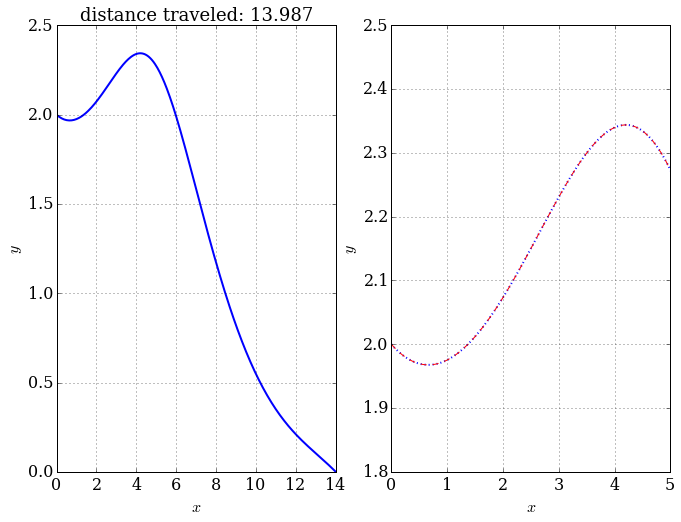

In [19]:
pyplot.figure(figsize=(11,8))
pyplot.subplot(121)
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(x_leapfrog[:idx_ground_leapfrog], y_leapfrog[:idx_ground_leapfrog], ls='-', lw=2)
pyplot.title('distance traveled: {:.3f}'.format(x_leapfrog[idx_ground_leapfrog-1]), fontsize=18);

# Let's take a closer look!
pyplot.subplot(122)
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(x_leapfrog[:idx_ground_leapfrog], y_leapfrog[:idx_ground_leapfrog], ls=':', lw=2)
pyplot.plot(x_rk2, y_rk2, 'r--', label='RK2')
pyplot.xlim(0,5)
pyplot.ylim(1.8,2.5);

In [20]:
r=2
h=.001

dt_values = numpy.array([h, r*h, r**2*h])
u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N= int(T/dt)+1
    t=numpy.linspace(0.0, T, N)
    u = numpy.empty((N,4))
    u[0] = numpy.array([v0, theta0, x0, y0])
    
    u[1] = rk2(u[0], f, dt)
    for n in range(N-1):
        u[n+1] = leapfrog(u[n-1], u[n], f, dt)
        
    u_values[i] = u
    
alpha = (log(get_diffgrid(u_values[2], u_values[1], dt_values[2])) -log(get_diffgrid(u_values[1], u_values[0], dt_values[1])))/log(r)

print('The order of convergence is alpha = {:3f}'.format(alpha))

6.5
6.49883298374
6.5
4.94630362095
6.49996813444
4.94163580206
6.49990320425
4.93696847099
6.49980518677
4.93230186929
6.49967405988
4.92763623841
6.49950980201
4.92297181964
6.49931239216
4.91830885414
6.49908180986
4.91364758292
6.49881803523
4.9089882468
6.49852104894
4.90433108643
6.49819083224
4.89967634229
6.49782736695
4.89502425462
6.49743063545
4.89037506349
6.49700062072
4.88572900871
6.4965373063
4.88108632987
6.49604067633
4.87644726631
6.49551071554
4.87181205712
6.49494740922
4.86718094111
6.49435074329
4.86255415682
6.49372070426
4.85793194249
6.49305727921
4.85331453604
6.49236045585
4.84870217512
6.49163022248
4.84409509701
6.49086656802
4.83949353868
6.49006948199
4.83489773673
6.48923895453
4.83030792742
6.48837497638
4.82572434662
6.48747753891
4.82114722983
6.4865466341
4.81657681214
6.48558225458
4.81201332827
6.48458439356
4.80745701247
6.48355304492
4.80290809861
6.48248820314
4.79836682008
6.48138986335
4.79383340985
6.4802580213
4.78930810041
6.4790926734
4.7

/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:16: RuntimeWarning: overflow encountered in double_scalars


ValueError: math domain error

In [ ]:
print(theta)